In [32]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
# Read the cleaned csv files
df_accident = pd.read_csv('accident_data.csv', low_memory=False)

df_vehicle = pd.read_csv('vehicle_data.csv', low_memory=False)

df_casualty = pd.read_csv('casualty_data.csv')

df_lsoa = pd.read_csv('lsoa_data.csv')

In [34]:
df_accident

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,hours,minutes
0,2020010219808,2020,010219808,521389.0,175144.0,-0.254001,51.462262,1,3,1,...,9,9,0,0,1,3,2,E01004576,9,0
1,2020010220496,2020,010220496,529337.0,176237.0,-0.139253,51.470327,1,3,1,...,1,1,0,0,1,1,2,E01003034,13,55
2,2020010228005,2020,010228005,526432.0,182761.0,-0.178719,51.529614,1,3,1,...,1,2,0,0,1,1,2,E01004726,1,25
3,2020010228006,2020,010228006,538676.0,184371.0,-0.001683,51.541210,1,2,1,...,1,1,0,0,1,1,2,E01003617,1,50
4,2020010228011,2020,010228011,529324.0,181286.0,-0.137592,51.515704,1,3,1,...,1,1,0,0,1,1,2,E01004763,2,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91194,2020991027064,2020,991027064,343034.0,731654.0,-2.926320,56.473539,99,2,2,...,1,1,0,0,1,1,-1,-1,14,30
91195,2020991029573,2020,991029573,257963.0,658891.0,-4.267565,55.802353,99,3,1,...,1,1,0,0,1,2,-1,-1,15,5
91196,2020991030297,2020,991030297,383664.0,810646.0,-2.271903,57.186317,99,2,2,...,1,1,0,0,2,1,-1,-1,12,42
91197,2020991030900,2020,991030900,277161.0,674852.0,-3.968753,55.950940,99,3,2,...,1,1,0,0,1,2,-1,-1,14,0


In [35]:
df_accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91199 entries, 0 to 91198
Data columns (total 38 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   accident_index                               91199 non-null  object 
 1   accident_year                                91199 non-null  int64  
 2   accident_reference                           91199 non-null  object 
 3   location_easting_osgr                        91199 non-null  float64
 4   location_northing_osgr                       91199 non-null  float64
 5   longitude                                    91199 non-null  float64
 6   latitude                                     91199 non-null  float64
 7   police_force                                 91199 non-null  int64  
 8   accident_severity                            91199 non-null  int64  
 9   number_of_vehicles                           91199 non-null  int64  
 10

In [36]:
df_vehicle

,vehicle_index,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,...,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type
0,681716,2020010219808,2020,010219808,1,9,9,5,1,5,...,6,2,32,6,1968.000000,2,6.000000,AUDI Q5,4,1
1,681717,2020010220496,2020,010220496,1,9,0,4,2,6,...,2,1,45,7,1395.000000,1,2.000000,AUDI A1,7,1
2,681718,2020010228005,2020,010228005,1,9,0,18,-1,-1,...,6,3,40,-1,1801.994021,-1,8.183994,-1,-1,-1
3,681719,2020010228006,2020,010228006,1,8,0,18,1,5,...,1,1,44,7,1798.000000,8,8.000000,TOYOTA PRIUS,2,1
4,681720,2020010228011,2020,010228011,1,9,0,18,3,7,...,6,1,20,4,2993.000000,2,4.000000,BMW 4 SERIES,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167370,849086,2020991030297,2020,991030297,1,9,0,7,8,2,...,1,1,57,9,1968.000000,2,2.000000,AUDI A5,7,1
167371,849087,2020991030297,2020,991030297,2,5,0,16,6,2,...,5,1,38,7,1301.000000,1,2.000000,KTM 1290 SUPERDUKE,9,2
167372,849088,2020991030900,2020,991030900,1,9,0,7,8,2,...,6,2,68,10,1995.000000,2,1.000000,BMW X3,5,1
167373,849089,2020991030900,2020,991030900,2,1,0,18,6,2,...,6,1,76,11,1801.994021,-1,8.183994,-1,9,1


In [37]:
df_vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167375 entries, 0 to 167374
Data columns (total 28 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   vehicle_index                     167375 non-null  int64  
 1   accident_index                    167375 non-null  object 
 2   accident_year                     167375 non-null  int64  
 3   accident_reference                167375 non-null  object 
 4   vehicle_reference                 167375 non-null  int64  
 5   vehicle_type                      167375 non-null  int64  
 6   towing_and_articulation           167375 non-null  int64  
 7   vehicle_manoeuvre                 167375 non-null  int64  
 8   vehicle_direction_from            167375 non-null  int64  
 9   vehicle_direction_to              167375 non-null  int64  
 10  vehicle_location_restricted_lane  167375 non-null  int64  
 11  junction_location                 167375 non-null  i

In [38]:
df_casualty

,casualty_index,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,484748,2020010219808,2020,010219808,1,1,3,1,31,6,3,9,5,0,0,0,0,1,4
1,484749,2020010220496,2020,010220496,1,1,3,2,2,1,3,1,1,0,0,0,0,1,2
2,484750,2020010220496,2020,010220496,1,2,3,2,4,1,3,1,1,0,0,0,0,1,2
3,484751,2020010228005,2020,010228005,1,1,3,1,23,5,3,5,9,0,0,0,0,1,3
4,484752,2020010228006,2020,010228006,1,1,3,1,47,8,2,4,1,0,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115579,600327,2020991027064,2020,991027064,2,1,1,1,11,3,2,0,0,0,0,0,1,1,2
115580,600328,2020991029573,2020,991029573,1,1,3,2,63,9,3,10,1,0,0,0,0,1,10
115581,600329,2020991030297,2020,991030297,2,1,1,1,38,7,2,0,0,0,0,0,5,2,9
115582,600330,2020991030900,2020,991030900,2,1,1,1,76,11,3,0,0,0,0,0,1,1,9


In [39]:
df_casualty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115584 entries, 0 to 115583
Data columns (total 19 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   casualty_index                      115584 non-null  int64 
 1   accident_index                      115584 non-null  object
 2   accident_year                       115584 non-null  int64 
 3   accident_reference                  115584 non-null  object
 4   vehicle_reference                   115584 non-null  int64 
 5   casualty_reference                  115584 non-null  int64 
 6   casualty_class                      115584 non-null  int64 
 7   sex_of_casualty                     115584 non-null  int64 
 8   age_of_casualty                     115584 non-null  int64 
 9   age_band_of_casualty                115584 non-null  int64 
 10  casualty_severity                   115584 non-null  int64 
 11  pedestrian_location                 115

In [40]:
df_lsoa

,objectid,lsoa01cd,lsoa01nm,lsoa01nmw,shape__area,shape__length,globalid
0,1,E01000001,City of London 001A,City of London 001A,1.298652e+05,2635.772001,68cc6127-1008-4fbe-a16c-78fb089a7c43
1,2,E01000002,City of London 001B,City of London 001B,2.284189e+05,2707.986202,937edbc3-c1bf-4d35-b274-b0a1480a7c09
2,3,E01000003,City of London 001C,City of London 001C,5.905477e+04,1224.774479,2686dcaf-10b9-4736-92af-4788d4feaa69
3,4,E01000004,City of London 001D,City of London 001D,2.544551e+06,10718.466240,3c493140-0b3f-4b9a-b358-22011dc5fb89
4,5,E01000005,City of London 001E,City of London 001E,1.895782e+05,2275.809358,b569093d-788d-41be-816c-d6d7658b2311
...,...,...,...,...,...,...,...
34373,34374,W01001892,Cardiff 020D,Caerdydd 020D,2.699088e+05,2537.220060,1a25aa1e-5db5-4d32-8355-473409dbd69f
34374,34375,W01001893,Cardiff 010B,Caerdydd 010B,4.288488e+06,9807.284401,b6af5e24-eb2a-404a-98a6-a282037b3e10
34375,34376,W01001894,Cardiff 010C,Caerdydd 010C,3.337511e+05,2929.546177,72d16f53-115d-4926-936d-2f1b1d659d46
34376,34377,W01001895,Cardiff 010D,Caerdydd 010D,1.360174e+06,8141.281226,8e105eb9-f68e-4cdb-bca6-b49f6592cb71


In [41]:
df_lsoa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34378 entries, 0 to 34377
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   objectid       34378 non-null  int64  
 1   lsoa01cd       34378 non-null  object 
 2   lsoa01nm       34378 non-null  object 
 3   lsoa01nmw      34378 non-null  object 
 4   shape__area    34378 non-null  float64
 5   shape__length  34378 non-null  float64
 6   globalid       34378 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 1.8+ MB


#### Accident Demography

#### Accident severity

In [42]:
df_accident['accident_severity']

0        3
1        3
2        3
3        2
4        3
        ..
91194    2
91195    3
91196    2
91197    3
91198    3
Name: accident_severity, Length: 91199, dtype: int64

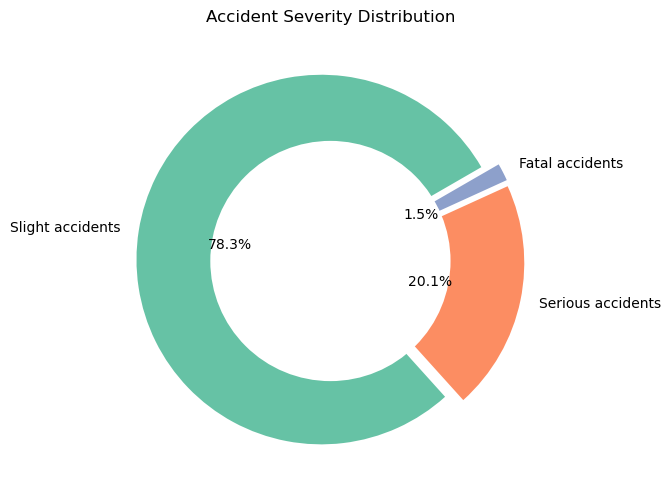

In [43]:
# Counting the occurrences 
severity_counts = df_accident['accident_severity'].value_counts()

# severity levels to descriptions
severity_labels = {1: 'Fatal accidents', 2: 'Serious accidents', 3: 'Slight accidents'}

# Replacing numeric labels with descriptions
severity_counts.index = severity_counts.index.map(severity_labels)

# Creating a pie chart
plt.figure(figsize=(6, 6))

# add space around the slices using explode
plt.pie(severity_counts, labels=severity_counts.index, autopct='%1.1f%%', startangle=30, explode=[0.05, 0.05, 0.05],
       pctdistance=0.5, colors=sns.color_palette('Set2'))

# Adding a hole  
hole = plt.Circle((0, 0), 0.65, facecolor='white')
plt.gcf().gca().add_artist(hole)

plt.title('Accident Severity Distribution')
plt.show()


#### Casualty and Driver Age Pyramid

In [44]:
df_vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167375 entries, 0 to 167374
Data columns (total 28 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   vehicle_index                     167375 non-null  int64  
 1   accident_index                    167375 non-null  object 
 2   accident_year                     167375 non-null  int64  
 3   accident_reference                167375 non-null  object 
 4   vehicle_reference                 167375 non-null  int64  
 5   vehicle_type                      167375 non-null  int64  
 6   towing_and_articulation           167375 non-null  int64  
 7   vehicle_manoeuvre                 167375 non-null  int64  
 8   vehicle_direction_from            167375 non-null  int64  
 9   vehicle_direction_to              167375 non-null  int64  
 10  vehicle_location_restricted_lane  167375 non-null  int64  
 11  junction_location                 167375 non-null  i

In [45]:
df_casualty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115584 entries, 0 to 115583
Data columns (total 19 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   casualty_index                      115584 non-null  int64 
 1   accident_index                      115584 non-null  object
 2   accident_year                       115584 non-null  int64 
 3   accident_reference                  115584 non-null  object
 4   vehicle_reference                   115584 non-null  int64 
 5   casualty_reference                  115584 non-null  int64 
 6   casualty_class                      115584 non-null  int64 
 7   sex_of_casualty                     115584 non-null  int64 
 8   age_of_casualty                     115584 non-null  int64 
 9   age_band_of_casualty                115584 non-null  int64 
 10  casualty_severity                   115584 non-null  int64 
 11  pedestrian_location                 115

Driver age pyramid

In [46]:
df_vehicle[['sex_of_driver', 'age_of_driver']]

,sex_of_driver,age_of_driver
0,2,32
1,1,45
2,3,40
3,1,44
4,1,20
...,...,...
167370,1,57
167371,1,38
167372,2,68
167373,1,76


In [47]:
df_vehicle['sex_of_driver'].unique()

array([2, 1, 3], dtype=int64)

In [48]:
# Creating a mapping 
sex_mapping = {1: 'Male', 2: 'Female', 3: 'Other'}

# new DataFrame with 'sex_of_driver', 'sex', and 'age'
new_df = pd.DataFrame({'sex_of_driver': df_vehicle['sex_of_driver'], 
                       'sex': df_vehicle['sex_of_driver'].map(sex_mapping),
                       'age': df_vehicle['age_of_driver']})

# Drop entries where 'sex_of_driver' is 3 
new_df = new_df[new_df['sex_of_driver'] != 3]

# new DataFrame
new_df

,sex_of_driver,sex,age
0,2,Female,32
1,1,Male,45
3,1,Male,44
4,1,Male,20
5,1,Male,25
...,...,...,...
167370,1,Male,57
167371,1,Male,38
167372,2,Female,68
167373,1,Male,76


Adding a new column 'age_band'

In [49]:
# Represents the bin edges for creating age bands
# np.inf is used to to represent positive infinity
bins = [0, 5, 10, 15, 20, 25, 35, 45, 55, 65, 75, np.inf]

# Labels for the corresponding age bands
labels = ['0-5', '6-10', '11-15', '16-20', '21-25', '26-35', '36-45', '46-55', '56-65', '66-75', '75+']

# Creating a new column 'Age Band'
new_df['Age Band'] = pd.cut(new_df['age'], bins=bins, labels=labels)

In [50]:
new_df

,sex_of_driver,sex,age,Age Band
0,2,Female,32,26-35
1,1,Male,45,36-45
3,1,Male,44,36-45
4,1,Male,20,16-20
5,1,Male,25,21-25
...,...,...,...,...
167370,1,Male,57,56-65
167371,1,Male,38,36-45
167372,2,Female,68,66-75
167373,1,Male,76,75+


In [51]:
# Extracting the age data of male and female separately to 'male' and 'female'
male = new_df.loc[new_df['sex'] == 'Male', 'age'].values
female = new_df.loc[new_df['sex'] == 'Female', 'age'].values

# Extracting the age band to 'age_group'
age_group = new_df['Age Band'].values


# Group by 'Age Band' and 'sex' counts the occurrences
# unstacks the result to create columns for 'Male' and 'Female' 
age_counts = new_df.groupby(['Age Band', 'sex']).size().unstack()

# Reset the index
age_counts.reset_index(inplace=True)

# Rename the columns
age_counts.columns.name = None


In [52]:
age_counts

,Age Band,Female,Male
0,0-5,0,0
1,6-10,0,0
2,11-15,0,0
3,16-20,2740,7407
4,21-25,4947,11552
5,26-35,10327,25126
6,36-45,9490,26186
7,46-55,6980,16714
8,56-65,4128,11266
9,66-75,1950,4944


In [53]:
# Extracting the data of male and female separately to 'male' and 'female'
male = age_counts ['Male'].values
female = age_counts ['Female'].values

# Extracting the age band to 'age_group'
age_group = age_counts['Age Band'].values


# Creating a new dataframe 'age_p' with columns 'Age', 'Male' and 'Female'
age_p = pd.DataFrame({'Age': age_group,'Male':male*-1 ,'Female':female })

AgeClass = age_group

Text(0.5, 1.0, 'Driver Age Pyramid')

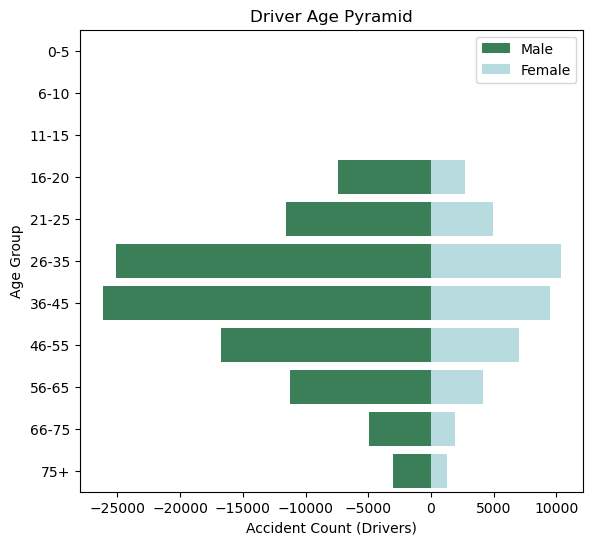

In [54]:
# Figure size
plt.figure(figsize=(6.5,6))

# Create the bar plot for Male
age_pyramid = sns.barplot(x='Male', y='Age', data=age_p, order=AgeClass, color=('seagreen'), label='Male') 

# Create the bar plot for Female
age_pyramid = sns.barplot(x='Female', y='Age', data=age_p, order=AgeClass, color=('powderblue'), label='Female') 

# Adding a legend
age_pyramid.legend() 

# Labels for x and y axes
age_pyramid.set(xlabel='Accident Count (Drivers)', ylabel='Age Group')


plt.title('Driver Age Pyramid')

 Causlaty Age Pyramid

In [55]:
df_casualty[['sex_of_casualty', 'age_of_casualty']]

,sex_of_casualty,age_of_casualty
0,1,31
1,2,2
2,2,4
3,1,23
4,1,47
...,...,...
115579,1,11
115580,2,63
115581,1,38
115582,1,76


In [56]:
df_casualty['sex_of_casualty'].unique()

array([1, 2, 9], dtype=int64)

In [57]:
# Creating a mapping 
sex_mapping = {1: 'Male', 2: 'Female', 9: 'Other'}

# new DataFrame with 'sex_of_casualty', 'sex', and 'age'
new_df = pd.DataFrame({'sex_of_casualty': df_casualty['sex_of_casualty'], 
                       'sex': df_casualty['sex_of_casualty'].map(sex_mapping),
                       'age': df_casualty['age_of_casualty']})

new_df = new_df[new_df['sex_of_casualty'] != 9]

# new DataFrame
new_df

,sex_of_casualty,sex,age
0,1,Male,31
1,2,Female,2
2,2,Female,4
3,1,Male,23
4,1,Male,47
...,...,...,...
115579,1,Male,11
115580,2,Female,63
115581,1,Male,38
115582,1,Male,76


Text(0.5, 1.0, 'Casualty Age Pyramid')

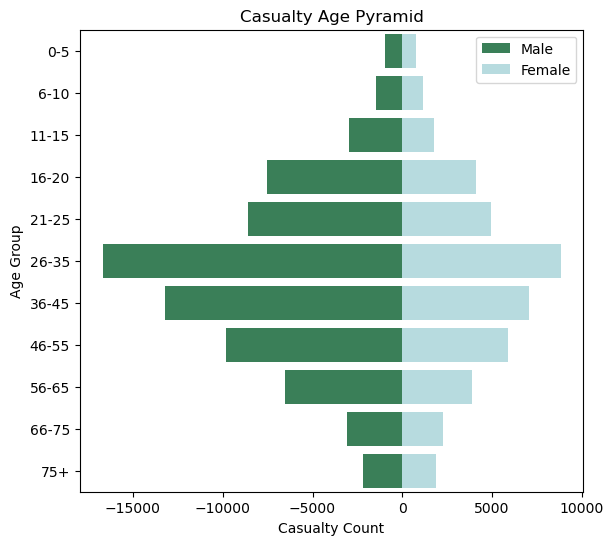

In [58]:
# Represents the bin edges for creating age bands
# np.inf is used to to represent positive infinity
bins = [0, 5, 10, 15, 20, 25, 35, 45, 55, 65, 75, np.inf]

# Labels for the corresponding age bands
labels = ['0-5', '6-10', '11-15', '16-20', '21-25', '26-35', '36-45', '46-55', '56-65', '66-75', '75+']

# Creating a new column 'Age Band'
new_df['Age Band'] = pd.cut(new_df['age'], bins=bins, labels=labels)

# Extracting the age data of male and female separately to 'male' and 'female'
male = new_df.loc[new_df['sex'] == 'Male', 'age'].values
female = new_df.loc[new_df['sex'] == 'Female', 'age'].values

# Extracting the age band to 'age_group'
age_group = new_df['Age Band'].values


# Group by 'Age Band' and 'sex' counts the occurrences
# unstacks the result to create columns for 'Male' and 'Female' 
age_counts = new_df.groupby(['Age Band', 'sex']).size().unstack()

# Reset the index
age_counts.reset_index(inplace=True)

# Rename the columns
age_counts.columns.name = None


# Extracting the data of male and female separately to 'male' and 'female'
male = age_counts ['Male'].values
female = age_counts ['Female'].values

# Extracting the age band to 'age_group'
age_group = age_counts['Age Band'].values


# Creating a new dataframe 'age_p' with columns 'Age', 'Male' and 'Female'
age_p = pd.DataFrame({'Age': age_group,'Male':male*-1 ,'Female':female })

AgeClass = age_group


# Figure size
plt.figure(figsize=(6.5,6))

# Create the bar plot for Male
age_pyramid = sns.barplot(x='Male', y='Age', data=age_p, order=AgeClass, color=('seagreen'), label='Male') 

# Create the bar plot for Female
age_pyramid = sns.barplot(x='Female', y='Age', data=age_p, order=AgeClass, color=('powderblue'), label='Female') 

# Adding a legend
age_pyramid.legend() 

# Labels for x and y axes
age_pyramid.set(xlabel='Casualty Count', ylabel='Age Group')


plt.title('Casualty Age Pyramid')

#### 1. Significant hours of the day and days of the week for accidents occurrence

Significant hours of the day

In [59]:
df_accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91199 entries, 0 to 91198
Data columns (total 38 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   accident_index                               91199 non-null  object 
 1   accident_year                                91199 non-null  int64  
 2   accident_reference                           91199 non-null  object 
 3   location_easting_osgr                        91199 non-null  float64
 4   location_northing_osgr                       91199 non-null  float64
 5   longitude                                    91199 non-null  float64
 6   latitude                                     91199 non-null  float64
 7   police_force                                 91199 non-null  int64  
 8   accident_severity                            91199 non-null  int64  
 9   number_of_vehicles                           91199 non-null  int64  
 10

In [60]:
df_accident['hours']

0         9
1        13
2         1
3         1
4         2
         ..
91194    14
91195    15
91196    12
91197    14
91198    13
Name: hours, Length: 91199, dtype: int64

In [61]:
accident_hour = df_accident['hours'].value_counts().sort_index()

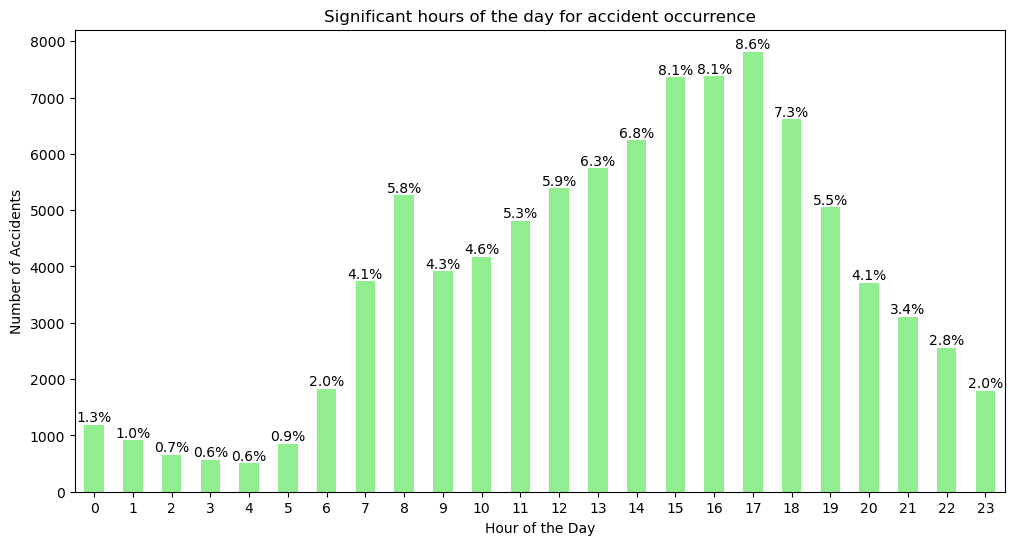

In [62]:
# Calculating the total number of accidents
accident_total = accident_hour.sum()

# Plotting
plt.figure(figsize=(12, 6))
ax = accident_hour.plot(kind='bar', color='lightgreen')
plt.title('Significant hours of the day for accident occurrence')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0)

# Annotating bars with percentages
for i in ax.patches: # iterate over each bar in the plot
    percentage = '{:.1f}%'.format(100 * i.get_height() / accident_total) # calculate the percentage of each bar
    
    # Calculating the position for annotating with percentage
    x = i.get_x() + i.get_width() / 2
    y = i.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()

Days of the week for accidents occurrence

In [63]:
df_accident['day_of_week'].unique()

array([3, 2, 4, 5, 6, 7, 1], dtype=int64)

In [64]:
accident_day = df_accident['day_of_week'].value_counts().sort_index()

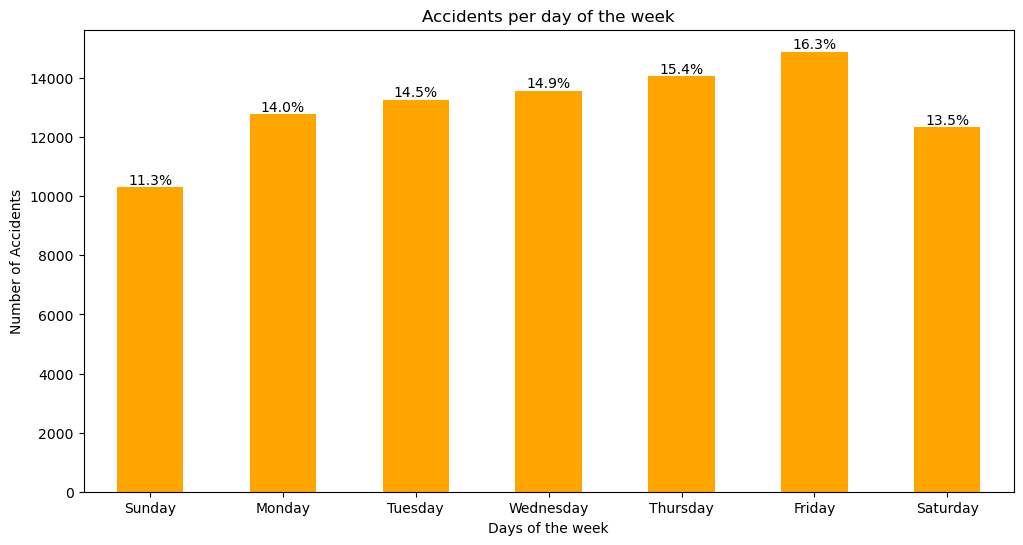

In [65]:
# Calculating the total number of accidents
accident_total = accident_day.sum()


days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Plotting
plt.figure(figsize=(12, 6))

ax = accident_day.plot(kind='bar', color='orange')
plt.title('Accidents per day of the week')
plt.xlabel('Days of the week')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0)

plt.xticks(range(7), days, rotation=0)

# Annotating bars with percentages
for i in ax.patches: # iterate over each bar in the plot
    percentage = '{:.1f}%'.format(100 * i.get_height() / accident_total) # calculate the percentage of each bar
    
    # Calculating the position for annotating with percentage
    x = i.get_x() + i.get_width() / 2
    y = i.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()

#### 2. Significant hours of the day and days of the week for accidents occurrence for motorbikes

Significant hours of the day for accidents occurrence for motorbikes.

In [66]:
df_vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167375 entries, 0 to 167374
Data columns (total 28 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   vehicle_index                     167375 non-null  int64  
 1   accident_index                    167375 non-null  object 
 2   accident_year                     167375 non-null  int64  
 3   accident_reference                167375 non-null  object 
 4   vehicle_reference                 167375 non-null  int64  
 5   vehicle_type                      167375 non-null  int64  
 6   towing_and_articulation           167375 non-null  int64  
 7   vehicle_manoeuvre                 167375 non-null  int64  
 8   vehicle_direction_from            167375 non-null  int64  
 9   vehicle_direction_to              167375 non-null  int64  
 10  vehicle_location_restricted_lane  167375 non-null  int64  
 11  junction_location                 167375 non-null  i

In [67]:
df_vehicle['vehicle_type'].unique()

array([ 9,  8,  3,  2, 11,  1, 90, 19,  4,  5, 21, 97, 20, 98, 10, 17, 23,
       22, 18, 16], dtype=int64)

In [68]:
df_accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91199 entries, 0 to 91198
Data columns (total 38 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   accident_index                               91199 non-null  object 
 1   accident_year                                91199 non-null  int64  
 2   accident_reference                           91199 non-null  object 
 3   location_easting_osgr                        91199 non-null  float64
 4   location_northing_osgr                       91199 non-null  float64
 5   longitude                                    91199 non-null  float64
 6   latitude                                     91199 non-null  float64
 7   police_force                                 91199 non-null  int64  
 8   accident_severity                            91199 non-null  int64  
 9   number_of_vehicles                           91199 non-null  int64  
 10

In [69]:
# Filtering df_vehicle for vehicle_type values 2, 3, 4, 5
# Where 2,3,4,5 corresponds to 50cc and under, 50cc to 125 cc, 125cc to 500cc, and over 500cc
new = df_vehicle[df_vehicle['vehicle_type'].isin([2, 3, 4, 5])]

In [70]:
new = new[['accident_index','vehicle_type']]

In [71]:
new

,accident_index,vehicle_type
12,2020010228020,3
32,2020010228077,2
33,2020010228086,3
36,2020010228097,3
58,2020010228148,3
...,...,...
167195,2020991010130,3
167292,2020991011809,3
167301,2020991012311,3
167304,2020991012353,4


This code will merge the new DataFrame with df_accident on the basis of accident_index. It will also includes the corresponding hours.

In [72]:
df_merged = pd.merge(new, df_accident[['accident_index', 'hours']], on='accident_index', how='left')

In [73]:
df_merged

,accident_index,vehicle_type,hours
0,2020010228020,3,3
1,2020010228077,2,8
2,2020010228086,3,14
3,2020010228097,3,14
4,2020010228148,3,19
...,...,...,...
14121,2020991010130,3,16
14122,2020991011809,3,17
14123,2020991012311,3,17
14124,2020991012353,4,15


In [74]:
bike_accident_hour = df_merged['hours'].value_counts().sort_index()

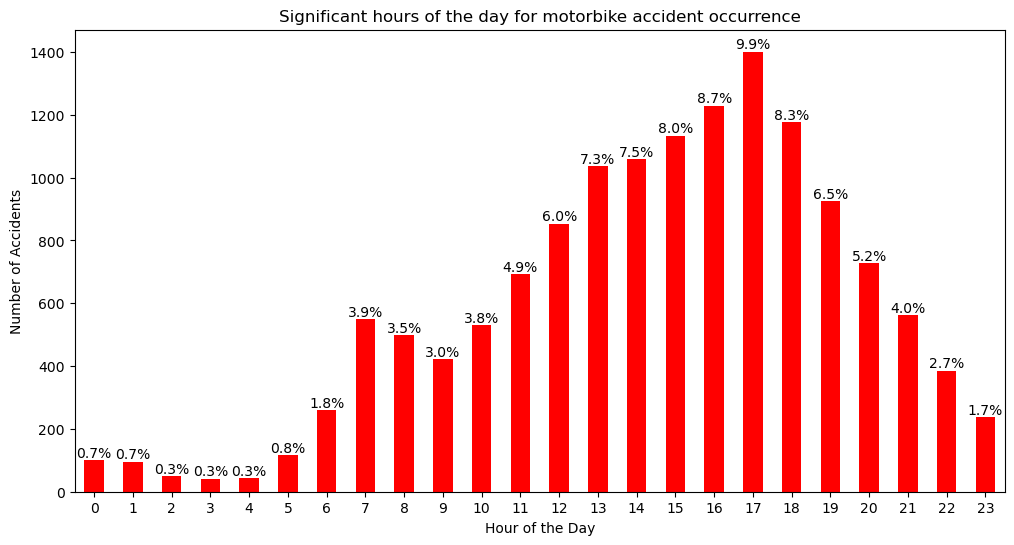

In [75]:
#Calculating the total number of bike accidents
bike_accident_total = bike_accident_hour.sum()

# Plotting
plt.figure(figsize=(12, 6))
ax = bike_accident_hour.plot(kind='bar', color='red')
plt.title('Significant hours of the day for motorbike accident occurrence')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0)

# Annotating bars with percentages
for i in ax.patches: # iterate over each bar in the plot
    percentage = '{:.1f}%'.format(100 * i.get_height() / bike_accident_total) # calculate the percentage of each bar
    
    # Calculating the position for annotating with percentage
    x = i.get_x() + i.get_width() / 2
    y = i.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()

Significant days of the week for accidents occurrence for motorbikes.

In [87]:
df_merged = pd.merge(new, df_accident[['accident_index', 'day_of_week']], on='accident_index', how='left')

In [88]:
df_merged

,accident_index,vehicle_type,day_of_week
0,2020010228020,3,4
1,2020010228077,2,4
2,2020010228086,3,4
3,2020010228097,3,4
4,2020010228148,3,4
...,...,...,...
14121,2020991010130,3,5
14122,2020991011809,3,4
14123,2020991012311,3,2
14124,2020991012353,4,5


In [89]:
under50cc_accidents = df_merged[df_merged['vehicle_type']==2]
o50_up125_accidents = df_merged[df_merged['vehicle_type']==3]
o125_up500_accidents = df_merged[df_merged['vehicle_type']==4]
o500_accidents = df_merged[df_merged['vehicle_type']==5]

In [90]:
# Counting the occurance of accidents in weekdays for different vehicles

under50cc_accidents_weekday = under50cc_accidents['day_of_week'].value_counts().sort_index()

o50_up125_accidents_weekday = o50_up125_accidents['day_of_week'].value_counts().sort_index()

o125_up500_accidents_weekday = o125_up500_accidents['day_of_week'].value_counts().sort_index()

o500_accidents_weekday = o500_accidents['day_of_week'].value_counts().sort_index()

In [91]:
o500_accidents_weekday.values

array([675, 468, 497, 501, 526, 567, 550], dtype=int64)

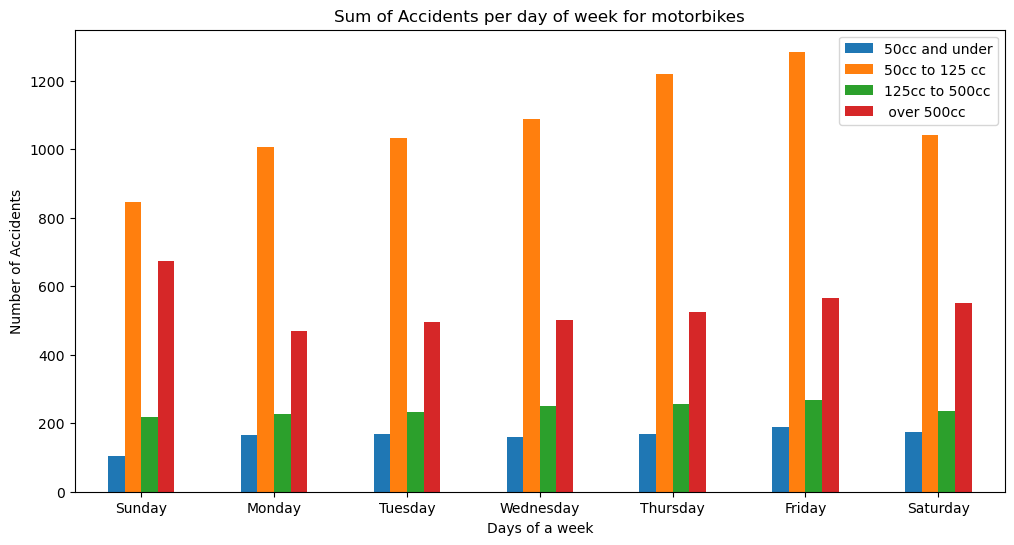

In [92]:
# Plotting
plotdata = pd.DataFrame({"50cc and under":[103, 165, 168, 160, 170, 189, 173], 
                         "50cc to 125 cc":[ 845, 1008, 1034, 1089, 1219, 1285, 1043],
                         "125cc to 500cc":[218, 227, 234, 251, 257, 267, 237],
                         " over 500cc":[675, 468, 497, 501, 526, 567, 550]},
                        index=["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"])

plotdata.plot(kind="bar", figsize=(12, 6))


plt.title('Sum of Accidents per day of week for motorbikes')
plt.xlabel('Days of a week')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0)


plt.show()

#### 3. The significant hours and days of the week when pedestrian accidents occur.

The significant hours of the week when pedestrian accidents occur.

In [76]:
df_accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91199 entries, 0 to 91198
Data columns (total 38 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   accident_index                               91199 non-null  object 
 1   accident_year                                91199 non-null  int64  
 2   accident_reference                           91199 non-null  object 
 3   location_easting_osgr                        91199 non-null  float64
 4   location_northing_osgr                       91199 non-null  float64
 5   longitude                                    91199 non-null  float64
 6   latitude                                     91199 non-null  float64
 7   police_force                                 91199 non-null  int64  
 8   accident_severity                            91199 non-null  int64  
 9   number_of_vehicles                           91199 non-null  int64  
 10

In [77]:
df_casualty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115584 entries, 0 to 115583
Data columns (total 19 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   casualty_index                      115584 non-null  int64 
 1   accident_index                      115584 non-null  object
 2   accident_year                       115584 non-null  int64 
 3   accident_reference                  115584 non-null  object
 4   vehicle_reference                   115584 non-null  int64 
 5   casualty_reference                  115584 non-null  int64 
 6   casualty_class                      115584 non-null  int64 
 7   sex_of_casualty                     115584 non-null  int64 
 8   age_of_casualty                     115584 non-null  int64 
 9   age_band_of_casualty                115584 non-null  int64 
 10  casualty_severity                   115584 non-null  int64 
 11  pedestrian_location                 115

In the df_casualty DataFrame, the attribute, 'casualty_class' with value '3' defines that the person is pedestrian.

In [78]:
df_casualty['casualty_class'].unique()

array([3, 1, 2], dtype=int64)

In [79]:
# Filtering df_casualty for casualty_class value 3
# Where 3 corresponds to pedestrian
new = df_casualty[df_casualty['casualty_class'].isin([3])]

new = new[['accident_index','casualty_class']]

In [80]:
new

,accident_index,casualty_class
0,2020010219808,3
1,2020010220496,3
2,2020010220496,3
3,2020010228005,3
4,2020010228006,3
...,...,...
115573,2020991023621,3
115574,2020991023880,3
115578,2020991024526,3
115580,2020991029573,3


In [81]:
df_merged_pedestrian = pd.merge(new, df_accident[['accident_index', 'hours']], on='accident_index', how='left')

In [82]:
df_merged_pedestrian

,accident_index,casualty_class,hours
0,2020010219808,3,9
1,2020010220496,3,13
2,2020010220496,3,13
3,2020010228005,3,1
4,2020010228006,3,1
...,...,...,...
14745,2020991023621,3,10
14746,2020991023880,3,17
14747,2020991024526,3,12
14748,2020991029573,3,15


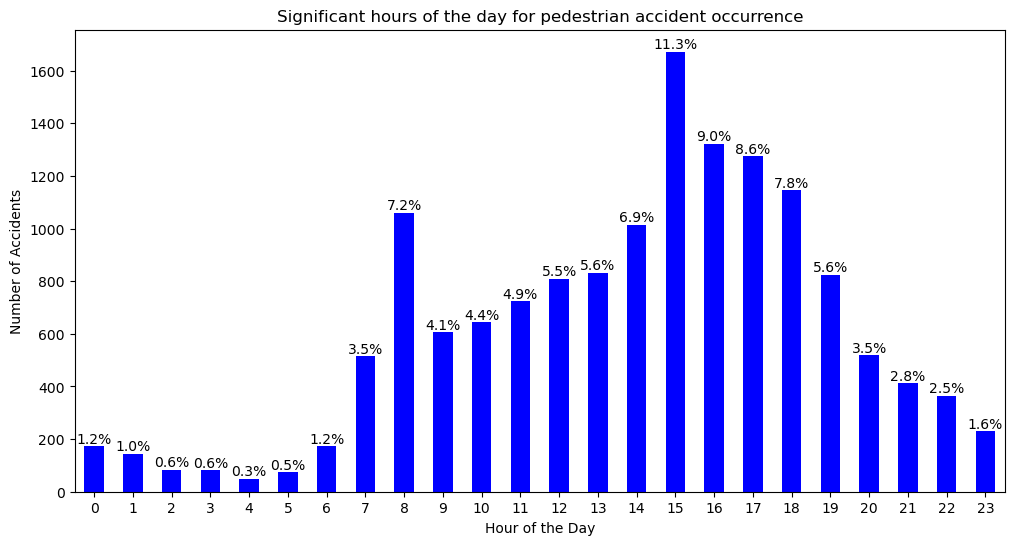

In [83]:
pedestrian_accident_hour = df_merged_pedestrian['hours'].value_counts().sort_index()


#Calculating the total number of pedestrian accidents
pedestrian_accident_total = pedestrian_accident_hour.sum()

# Plotting
plt.figure(figsize=(12, 6))
ax = pedestrian_accident_hour.plot(kind='bar', color='blue')
plt.title('Significant hours of the day for pedestrian accident occurrence')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0)

# Annotating bars with percentages
for i in ax.patches: # iterate over each bar in the plot
    percentage = '{:.1f}%'.format(100 * i.get_height() / pedestrian_accident_total) # calculate the percentage of each bar
    
    # Calculating the position for annotating with percentage
    x = i.get_x() + i.get_width() / 2
    y = i.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()


Days of the week when pedestrian accidents occur.

In [84]:
# Merging 'new' DataFrame
df_merged_pedestrian = pd.merge(new, df_accident[['accident_index', 'day_of_week']], on='accident_index', how='left')

In [85]:
df_merged_pedestrian

,accident_index,casualty_class,day_of_week
0,2020010219808,3,3
1,2020010220496,3,2
2,2020010220496,3,2
3,2020010228005,3,4
4,2020010228006,3,4
...,...,...,...
14745,2020991023621,3,3
14746,2020991023880,3,2
14747,2020991024526,3,3
14748,2020991029573,3,6


In [86]:
pedestrian_accident_day = df_merged_pedestrian['day_of_week'].value_counts().sort_index()

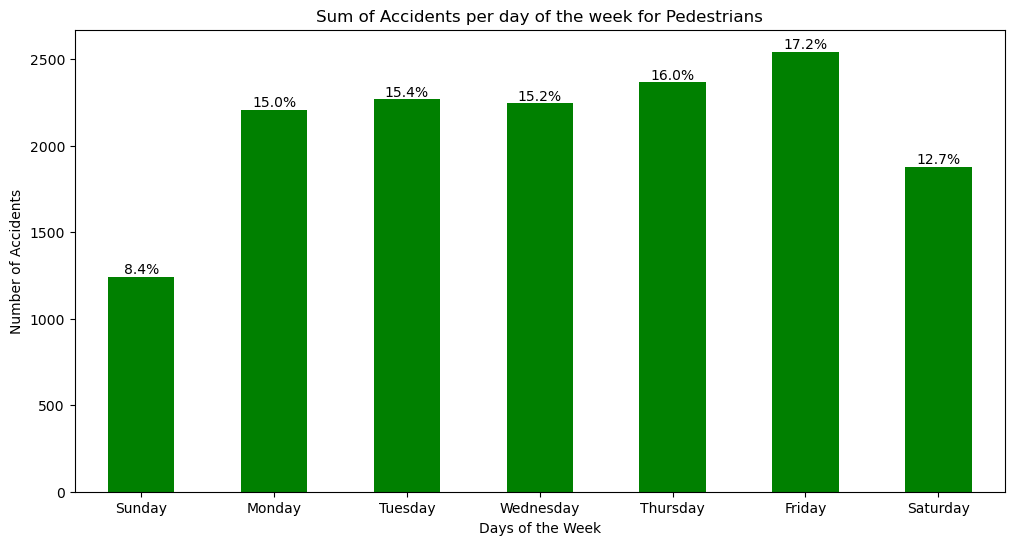

In [87]:
# Calculating the total number of pedestrian accidents
pedestrian_accident_total = pedestrian_accident_day.sum()


days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Plotting
plt.figure(figsize=(12, 6))

ax = pedestrian_accident_day.plot(kind='bar', color='green')
plt.title('Sum of Accidents per day of the week for Pedestrians')
plt.xlabel('Days of the Week')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0)

plt.xticks(range(7), days, rotation=0)

# Annotating bars with percentages
for i in ax.patches: # iterate over each bar in the plot
    percentage = '{:.1f}%'.format(100 * i.get_height() / pedestrian_accident_total) # calculate the percentage of each bar
    
    # Calculating the position for annotating with percentage
    x = i.get_x() + i.get_width() / 2
    y = i.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()

Distribution of accident occurrence per weekdays for different casualty types

In [88]:
# Creating a 'new' DataFrame containing 'accident_index' and 'casualty_class'
new = df_casualty[['accident_index', 'casualty_class']]

#Merging 'new' with 'df_accident' to extract 'day_of_week'
df_merged = pd.merge(new, df_accident[['accident_index', 'day_of_week']], on='accident_index', how='left')

# Fitering and counting corresponding values
Driver = df_merged[df_merged['casualty_class']==1]
Driver_accidents_weekday = Driver['day_of_week'].value_counts().sort_index()

Passenger = df_merged[df_merged['casualty_class']==2]
Passenger_accidents_weekday = Passenger['day_of_week'].value_counts().sort_index()


Pedestrian = df_merged[df_merged['casualty_class']==3]
Pedestrian_weekday = Pedestrian['day_of_week'].value_counts().sort_index()

In [89]:
Pedestrian_weekday.values

array([1242, 2207, 2267, 2247, 2366, 2543, 1878], dtype=int64)

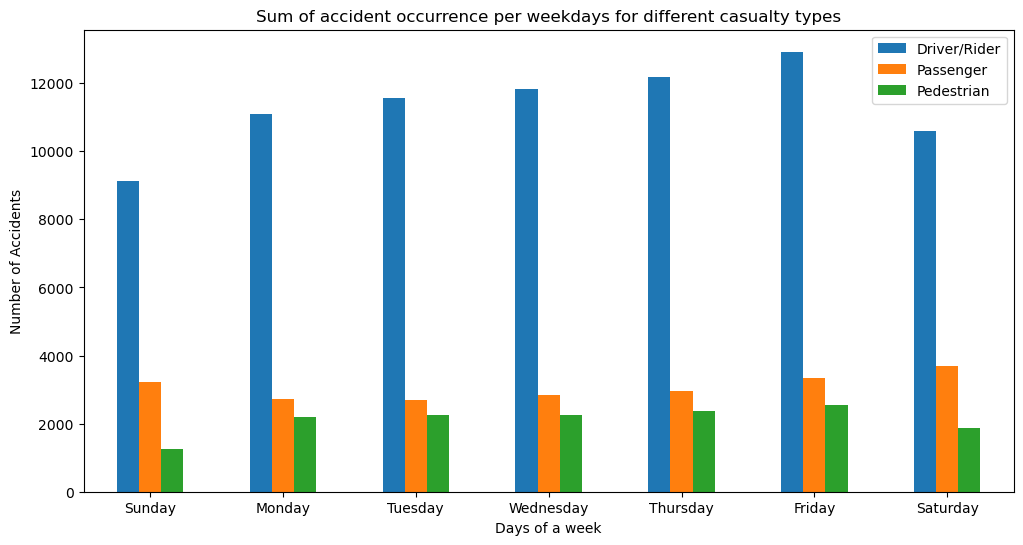

In [90]:
# Plotting
plotdata = pd.DataFrame({"Driver/Rider":[9129, 11104, 11552, 11842, 12190, 12923, 10590], 
                         "Passenger":[ 3227, 2725, 2700, 2854, 2952, 3352, 3694],
                         "Pedestrian":[1242, 2207, 2267, 2247, 2366, 2543, 1878]},
                        index=["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"])

plotdata.plot(kind="bar", figsize=(12, 6))


plt.title('Sum of accident occurrence per weekdays for different casualty types')
plt.xlabel('Days of a week')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0)


plt.show()

#### 4. Effect of light and weather condition

Effect of Light condition

In [91]:
df_accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91199 entries, 0 to 91198
Data columns (total 38 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   accident_index                               91199 non-null  object 
 1   accident_year                                91199 non-null  int64  
 2   accident_reference                           91199 non-null  object 
 3   location_easting_osgr                        91199 non-null  float64
 4   location_northing_osgr                       91199 non-null  float64
 5   longitude                                    91199 non-null  float64
 6   latitude                                     91199 non-null  float64
 7   police_force                                 91199 non-null  int64  
 8   accident_severity                            91199 non-null  int64  
 9   number_of_vehicles                           91199 non-null  int64  
 10

In [92]:
df_accident['light_conditions'].unique()

array([1, 4, 5, 7, 6], dtype=int64)

In [93]:
df_accident['weather_conditions'].unique()

array([9, 1, 8, 7, 2, 4, 5, 3, 6], dtype=int64)

In [94]:
light_conditions = df_accident['light_conditions'].value_counts().sort_index()

In [95]:
light_conditions

1    64459
4    19026
5      685
6     4835
7     2194
Name: light_conditions, dtype: int64

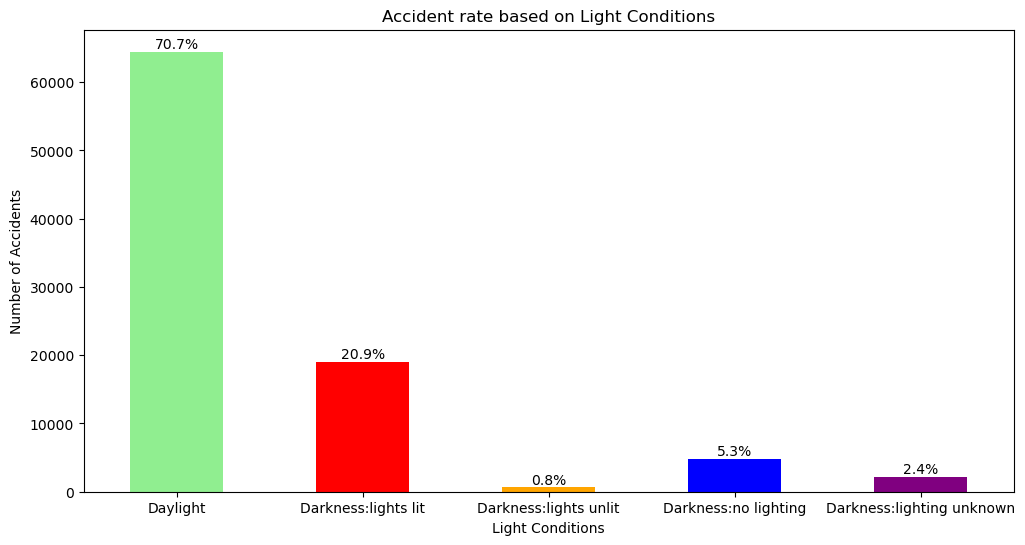

In [96]:
# Calculating the total 
light_conditions_total = light_conditions.sum()


condition = ['Daylight', 'Darkness:lights lit', 'Darkness:lights unlit', 'Darkness:no lighting',  'Darkness:lighting unknown']

colors = ['lightgreen', 'red', 'orange', 'blue', 'purple']

# Plotting
plt.figure(figsize=(12, 6))

ax = light_conditions.plot(kind='bar', color= colors)
plt.title('Accident rate based on Light Conditions')
plt.xlabel('Light Conditions')
plt.ylabel('Number of Accidents')


plt.xticks(range(5), condition, rotation=0)


# Annotating bars with percentages
for i in ax.patches: # iterate over each bar in the plot
    percentage = '{:.1f}%'.format(100 * i.get_height() / light_conditions_total) # calculate the percentage of each bar
    
    # Calculating the position for annotating with percentage
    x = i.get_x() + i.get_width() / 2
    y = i.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()

Effect of Weather condition

In [97]:
df_accident['weather_conditions'].unique()

array([9, 1, 8, 7, 2, 4, 5, 3, 6], dtype=int64)

In [98]:
weather_conditions = df_accident['weather_conditions'].value_counts().sort_index()
weather_conditions

1    70730
2    11583
3      185
4     1401
5     1665
6       73
7      510
8     2629
9     2423
Name: weather_conditions, dtype: int64

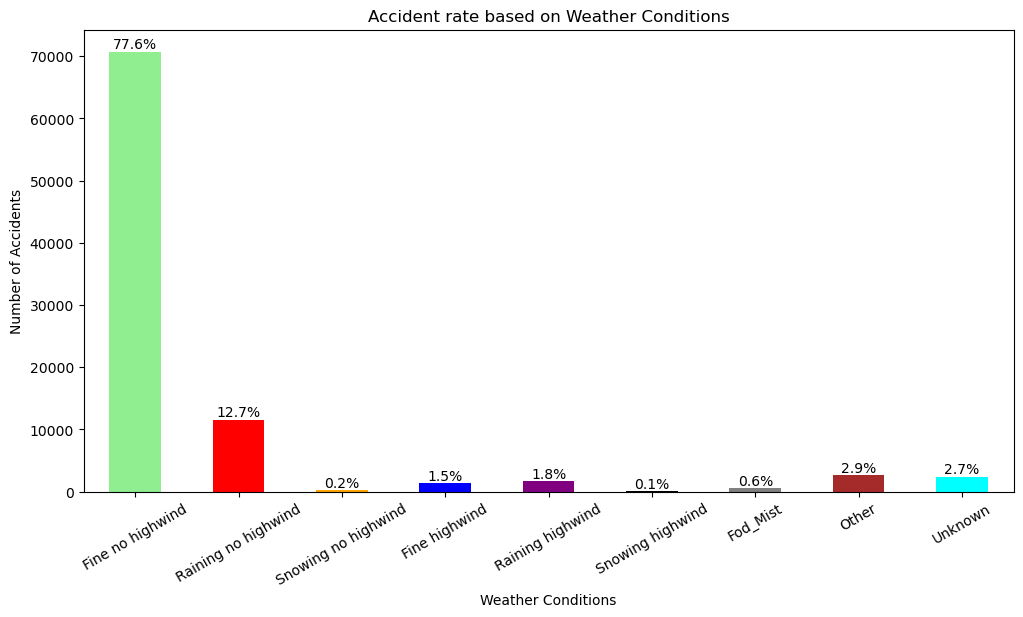

In [99]:
# Calculating the total 
weather_conditions_total = weather_conditions.sum()


condition = ['Fine no highwind','Raining no highwind', 'Snowing no highwind', 'Fine highwind','Raining highwind', 'Snowing highwind', 'Fod_Mist', 'Other', 'Unknown']

colors = ['lightgreen', 'red', 'orange', 'blue', 'purple', 'black', 'gray', 'brown', 'cyan']

# Plotting
plt.figure(figsize=(12, 6))

ax = weather_conditions.plot(kind='bar', color= colors)
plt.title('Accident rate based on Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Accidents')


plt.xticks(range(9), condition, rotation=30)


# Annotating bars with percentages
for i in ax.patches: # iterate over each bar in the plot
    percentage = '{:.1f}%'.format(100 * i.get_height() / weather_conditions_total) # calculate the percentage of each bar
    
    # Calculating the position for annotating with percentage
    x = i.get_x() + i.get_width() / 2
    y = i.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()

#### 5. Exploring the impact of selected variables on accident severity using the apriori algorithm

In [100]:
# Importing necessary libraries.
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [101]:
df_apriori = df_accident[['accident_severity', 'speed_limit', 'weather_conditions', 'urban_or_rural_area']]

In [102]:
df_apriori

,accident_severity,speed_limit,weather_conditions,urban_or_rural_area
0,3,20,9,1
1,3,20,1,1
2,3,30,1,1
3,2,30,1,1
4,3,30,1,1
...,...,...,...,...
91194,2,30,1,1
91195,3,30,1,1
91196,2,60,1,2
91197,3,30,1,1


In [103]:
df_apriori['weather_conditions'].unique()

array([9, 1, 8, 7, 2, 4, 5, 3, 6], dtype=int64)

In [104]:
df_apriori['accident_severity'].unique()

array([3, 2, 1], dtype=int64)

##### One-hot-encoding

In [105]:
a_severity = pd.get_dummies(df_accident.accident_severity, prefix = 'severity', dtype = int)

In [106]:
a_severity

,severity_1,severity_2,severity_3
0,0,0,1
1,0,0,1
2,0,0,1
3,0,1,0
4,0,0,1
...,...,...,...
91194,0,1,0
91195,0,0,1
91196,0,1,0
91197,0,0,1


In [107]:
w_conditions = pd.get_dummies(df_accident.weather_conditions, prefix = 'weather', dtype = int )

In [108]:
w_conditions

,weather_1,weather_2,weather_3,weather_4,weather_5,weather_6,weather_7,weather_8,weather_9
0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
91194,1,0,0,0,0,0,0,0,0
91195,1,0,0,0,0,0,0,0,0
91196,1,0,0,0,0,0,0,0,0
91197,1,0,0,0,0,0,0,0,0


In [109]:
s_limit = pd.get_dummies(df_accident.speed_limit, prefix = 'speed', dtype = int )

In [110]:
s_limit

,speed_20,speed_30,speed_36,speed_40,speed_50,speed_60,speed_70
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
91194,0,1,0,0,0,0,0
91195,0,1,0,0,0,0,0
91196,0,0,0,0,0,1,0
91197,0,1,0,0,0,0,0


In [111]:
urban_rural = pd.get_dummies(df_accident.speed_limit, prefix = 'urban_or_rural_area', dtype = int )

In [112]:
urban_rural

,urban_or_rural_area_20,urban_or_rural_area_30,urban_or_rural_area_36,urban_or_rural_area_40,urban_or_rural_area_50,urban_or_rural_area_60,urban_or_rural_area_70
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
91194,0,1,0,0,0,0,0
91195,0,1,0,0,0,0,0
91196,0,0,0,0,0,1,0
91197,0,1,0,0,0,0,0


In [113]:
df_acc_onehot = pd.concat([a_severity, w_conditions, s_limit,urban_rural], axis = 1)

In [114]:
df_acc_onehot

,severity_1,severity_2,severity_3,weather_1,weather_2,weather_3,weather_4,weather_5,weather_6,weather_7,...,speed_50,speed_60,speed_70,urban_or_rural_area_20,urban_or_rural_area_30,urban_or_rural_area_36,urban_or_rural_area_40,urban_or_rural_area_50,urban_or_rural_area_60,urban_or_rural_area_70
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,1,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91194,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
91195,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
91196,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
91197,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [115]:
a_priori = apriori(df_acc_onehot, min_support = 0.3, use_colnames = True)

C:\Users\binto\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [116]:
a_priori

,support,itemsets
0,0.783484,(severity_3)
1,0.775557,(weather_1)
2,0.573033,(speed_30)
3,0.573033,(urban_or_rural_area_30)
4,0.603186,"(weather_1, severity_3)"
5,0.459983,"(speed_30, severity_3)"
6,0.459983,"(urban_or_rural_area_30, severity_3)"
7,0.450137,"(weather_1, speed_30)"
8,0.450137,"(urban_or_rural_area_30, weather_1)"
9,0.573033,"(urban_or_rural_area_30, speed_30)"


In [117]:
freq_item_sets = a_priori

In [118]:
l_rules = association_rules(freq_item_sets, metric = 'lift', min_threshold = 1.05)

In [119]:
l_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(urban_or_rural_area_30),(speed_30),0.573033,0.573033,0.573033,1.000000,1.745101,0.244666,inf,1.000000
1,(speed_30),(urban_or_rural_area_30),0.573033,0.573033,0.573033,1.000000,1.745101,0.244666,inf,1.000000
2,"(urban_or_rural_area_30, severity_3)",(speed_30),0.459983,0.573033,0.459983,1.000000,1.745101,0.196398,inf,0.790656
3,"(speed_30, severity_3)",(urban_or_rural_area_30),0.459983,0.573033,0.459983,1.000000,1.745101,0.196398,inf,0.790656
4,(urban_or_rural_area_30),"(speed_30, severity_3)",0.573033,0.459983,0.459983,0.802717,1.745101,0.196398,2.737273,1.000000
5,(speed_30),"(urban_or_rural_area_30, severity_3)",0.573033,0.459983,0.459983,0.802717,1.745101,0.196398,2.737273,1.000000
6,"(urban_or_rural_area_30, weather_1)",(speed_30),0.450137,0.573033,0.450137,1.000000,1.745101,0.192194,inf,0.776497
7,"(weather_1, speed_30)",(urban_or_rural_area_30),0.450137,0.573033,0.450137,1.000000,1.745101,0.192194,inf,0.776497
8,(urban_or_rural_area_30),"(weather_1, speed_30)",0.573033,0.450137,0.450137,0.785534,1.745101,0.192194,2.563871,1.000000
9,(speed_30),"(urban_or_rural_area_30, weather_1)",0.573033,0.450137,0.450137,0.785534,1.745101,0.192194,2.563871,1.000000


In [120]:
confi_rules = association_rules(freq_item_sets, metric = 'confidence', min_threshold = 0.7)

In [121]:
confi_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(weather_1),(severity_3),0.775557,0.783484,0.603186,0.777746,0.992676,-0.004450,0.974182,-0.031826
1,(severity_3),(weather_1),0.783484,0.775557,0.603186,0.769877,0.992676,-0.004450,0.975317,-0.032953
2,(speed_30),(severity_3),0.573033,0.783484,0.459983,0.802717,1.024548,0.011021,1.097488,0.056116
3,(urban_or_rural_area_30),(severity_3),0.573033,0.783484,0.459983,0.802717,1.024548,0.011021,1.097488,0.056116
4,(speed_30),(weather_1),0.573033,0.775557,0.450137,0.785534,1.012864,0.005717,1.046521,0.029747
5,(urban_or_rural_area_30),(weather_1),0.573033,0.775557,0.450137,0.785534,1.012864,0.005717,1.046521,0.029747
6,(urban_or_rural_area_30),(speed_30),0.573033,0.573033,0.573033,1.000000,1.745101,0.244666,inf,1.000000
7,(speed_30),(urban_or_rural_area_30),0.573033,0.573033,0.573033,1.000000,1.745101,0.244666,inf,1.000000
8,"(weather_1, speed_30)",(severity_3),0.450137,0.783484,0.359697,0.799084,1.019911,0.007022,1.077643,0.035503
9,"(speed_30, severity_3)",(weather_1),0.459983,0.775557,0.359697,0.781979,1.008280,0.002954,1.029455,0.015207


#### 6. Clustering Humberside Region

In [122]:
from sklearn.cluster import KMeans

In [123]:
df_lsoa

,objectid,lsoa01cd,lsoa01nm,lsoa01nmw,shape__area,shape__length,globalid
0,1,E01000001,City of London 001A,City of London 001A,1.298652e+05,2635.772001,68cc6127-1008-4fbe-a16c-78fb089a7c43
1,2,E01000002,City of London 001B,City of London 001B,2.284189e+05,2707.986202,937edbc3-c1bf-4d35-b274-b0a1480a7c09
2,3,E01000003,City of London 001C,City of London 001C,5.905477e+04,1224.774479,2686dcaf-10b9-4736-92af-4788d4feaa69
3,4,E01000004,City of London 001D,City of London 001D,2.544551e+06,10718.466240,3c493140-0b3f-4b9a-b358-22011dc5fb89
4,5,E01000005,City of London 001E,City of London 001E,1.895782e+05,2275.809358,b569093d-788d-41be-816c-d6d7658b2311
...,...,...,...,...,...,...,...
34373,34374,W01001892,Cardiff 020D,Caerdydd 020D,2.699088e+05,2537.220060,1a25aa1e-5db5-4d32-8355-473409dbd69f
34374,34375,W01001893,Cardiff 010B,Caerdydd 010B,4.288488e+06,9807.284401,b6af5e24-eb2a-404a-98a6-a282037b3e10
34375,34376,W01001894,Cardiff 010C,Caerdydd 010C,3.337511e+05,2929.546177,72d16f53-115d-4926-936d-2f1b1d659d46
34376,34377,W01001895,Cardiff 010D,Caerdydd 010D,1.360174e+06,8141.281226,8e105eb9-f68e-4cdb-bca6-b49f6592cb71


In [124]:
kingston_upon_hull = df_lsoa[df_lsoa['lsoa01nm'].str.startswith('Kingston upon Hull')]

In [125]:
kingston_upon_hull

,objectid,lsoa01cd,lsoa01nm,lsoa01nmw,shape__area,shape__length,globalid
12755,12756,E01012756,Kingston upon Hull 025A,Kingston upon Hull 025A,198940.919128,3498.355895,6f44ac4a-9449-4c64-8564-6f612bf9a060
12756,12757,E01012757,Kingston upon Hull 025B,Kingston upon Hull 025B,318087.393494,3716.587517,e1c0a075-7ca8-425e-8437-39db56a6b994
12757,12758,E01012758,Kingston upon Hull 018A,Kingston upon Hull 018A,311920.258041,3775.303823,a049347f-f7fb-481f-90ca-a95e632ac97a
12758,12759,E01012759,Kingston upon Hull 025C,Kingston upon Hull 025C,398188.211227,3984.807880,f55da506-35c7-4db5-a007-bba4255d50e3
12759,12760,E01012760,Kingston upon Hull 025D,Kingston upon Hull 025D,125999.228485,2082.915305,dc1e40d1-79fe-4cda-b204-d22f9362b043
...,...,...,...,...,...,...,...
12913,12914,E01012914,Kingston upon Hull 012C,Kingston upon Hull 012C,710303.255646,5041.700669,cffb08e3-6c6b-4a4b-9ae2-33c7558359e5
12914,12915,E01012915,Kingston upon Hull 008E,Kingston upon Hull 008E,262494.227234,3192.736490,ae097b6b-47d1-4b41-8743-8a78aeb6e408
12915,12916,E01012916,Kingston upon Hull 012D,Kingston upon Hull 012D,546988.155197,3973.545932,f238c3d8-e0f7-4648-81f9-1c407b46a7ca
12916,12917,E01012917,Kingston upon Hull 008F,Kingston upon Hull 008F,400908.828018,3816.251453,644cfeaf-d9c6-4e49-b64e-31220ee8d4ed


In [126]:
df_accident[df_accident['lsoa_of_accident_location'] == 'E01012756']

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,hours,minutes
38758,2020160977368,2020,160977368,507270.0,430281.0,-0.374424,53.757876,16,3,2,...,1,1,0,0,1,1,2,E01012756,18,15
39326,2020161005358,2020,161005358,507296.0,430086.0,-0.374097,53.756118,16,3,2,...,1,1,0,0,1,2,2,E01012756,15,54


The regions, Kingston Upon Hull, Humberside and East Riding of Yorkshire are filtered with the police force.

In [127]:
df_accident[df_accident['police_force'] == 16]

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,hours,minutes
37750,2020160914781,2020,160914781,510156.0,429221.0,-0.331047,53.747751,16,2,1,...,1,1,0,0,1,1,2,E01033109,2,34
37751,2020160914930,2020,160914930,506050.0,428813.0,-0.393424,53.744936,16,3,2,...,1,1,0,0,1,1,2,E01012777,11,20
37752,2020160915008,2020,160915008,497660.0,402806.0,-0.528743,53.512895,16,3,1,...,1,1,0,0,2,1,2,E01013325,16,17
37753,2020160915028,2020,160915028,510449.0,434112.0,-0.324858,53.791630,16,2,1,...,1,1,0,0,1,1,2,E01012788,17,30
37754,2020160915041,2020,160915041,526236.0,410340.0,-0.095008,53.574501,16,3,1,...,1,1,0,0,1,1,2,E01013220,22,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39454,2020161014491,2020,161014491,489433.0,408637.0,-0.651104,53.566753,16,3,2,...,1,1,0,0,1,2,2,E01013239,15,18
39455,2020161014528,2020,161014528,503756.0,439285.0,-0.424674,53.839482,16,3,2,...,1,1,0,0,1,2,2,E01013041,16,50
39456,2020161014544,2020,161014544,511525.0,433149.0,-0.308880,53.782750,16,3,1,...,1,1,0,0,1,2,2,E01012907,9,12
39457,2020161014546,2020,161014546,485978.0,408912.0,-0.703181,53.569801,16,3,2,...,1,1,0,1,2,2,1,E01013286,12,41


In [128]:
# Filtering df_accident to select rows with 'police_force' equals to 16 representing Humberside Police Station
Humberside = df_accident[df_accident['police_force'] == 16]

# Extracted columns are converted into array
Humberside_array = Humberside[['longitude','latitude']].to_numpy()

<Axes: xlabel='longitude', ylabel='latitude'>

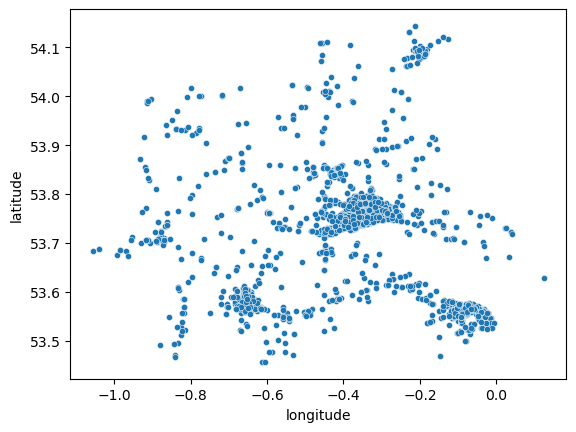

In [129]:
sns.scatterplot(data = Humberside, x = 'longitude', y = 'latitude', s=20)

Elbow curve : For optimal number of clusters

C:\Users\binto\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\binto\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\Users\binto\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\binto\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

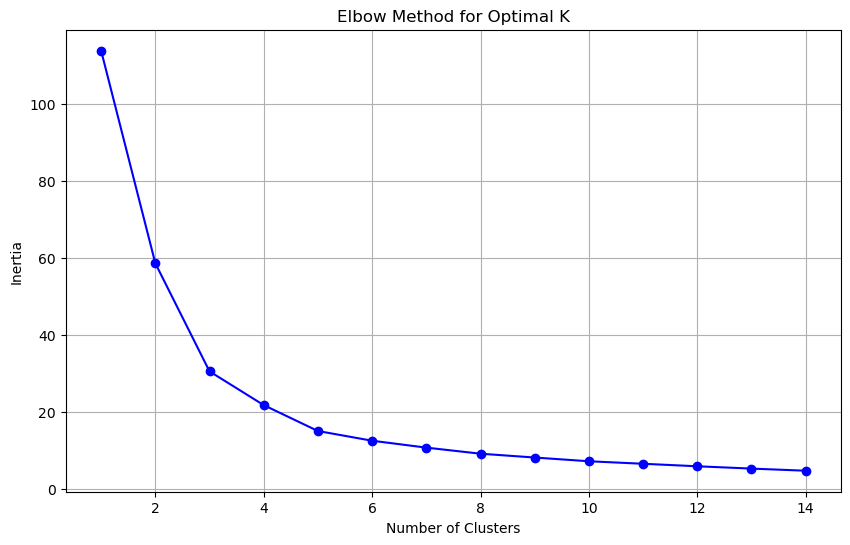

In [130]:
inertia = []

clusters_range = range(1, 15)

# Fit KMeans with different cluster numbers and calculate inertia
for k in clusters_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(Humberside_array)
    inertia.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(clusters_range, inertia, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [131]:
# Initializing with 5 clusters
kmeans = KMeans(n_clusters = 5)

# Fitting the model to Humberside data
kmeans.fit(Humberside_array)

C:\Users\binto\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\binto\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


KMeans(n_clusters=5)

In [132]:
# Predicting cluster labels
labels = kmeans.predict(Humberside_array)

centers = kmeans.cluster_centers_

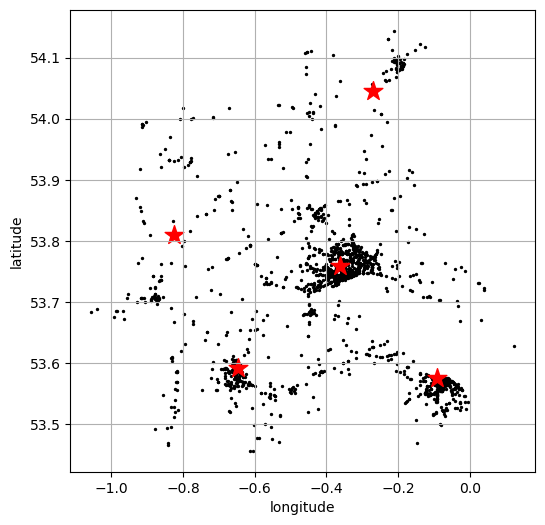

In [133]:
plt.figure(figsize=(6,6))
plt.scatter(data = Humberside, x = 'longitude', y = 'latitude', s=2, color='black')
plt.xlabel('longitude')
plt.ylabel('latitude')


# Plot cluster centers
plt.scatter(centers[:,0], centers[:,1], marker='*', color='red', s=200, label='Cluster Centers')
plt.grid(True)

plt.show()

In [134]:
# Folium library for mapping
import folium

# Initializing the map around the mean latitude and longitude
map_clusters = folium.Map(location=[Humberside['latitude'].mean(), Humberside['longitude'].mean()], zoom_start=8.5)

# Adding the cluster centers to the map
for center in centers:
    folium.Marker(location=[center[1], center[0]], icon=folium.Icon(color='red', icon='star')).add_to(map_clusters)

# Adding the accident locations to the map
for idx, row in Humberside.iterrows():
    folium.CircleMarker(location=[row['latitude'], row['longitude']], radius=2, color='black', fill=True, fill_color='black').add_to(map_clusters)

In [135]:
map_clusters

KMeans for speed_limit and weather_condition

In [136]:
df_accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91199 entries, 0 to 91198
Data columns (total 38 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   accident_index                               91199 non-null  object 
 1   accident_year                                91199 non-null  int64  
 2   accident_reference                           91199 non-null  object 
 3   location_easting_osgr                        91199 non-null  float64
 4   location_northing_osgr                       91199 non-null  float64
 5   longitude                                    91199 non-null  float64
 6   latitude                                     91199 non-null  float64
 7   police_force                                 91199 non-null  int64  
 8   accident_severity                            91199 non-null  int64  
 9   number_of_vehicles                           91199 non-null  int64  
 10

In [137]:
df_accident_speed_weather = df_accident[['speed_limit','weather_conditions']].to_numpy()

df_accident_speed_weather

array([[20,  9],
       [20,  1],
       [30,  1],
       ...,
       [60,  1],
       [30,  1],
       [30,  1]], dtype=int64)

In [138]:
kmeans = KMeans(n_clusters = 5)
kmeans.fit(df_accident_speed_weather)

C:\Users\binto\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

In [139]:
labels = kmeans.predict(df_accident_speed_weather)
centers = kmeans.cluster_centers_

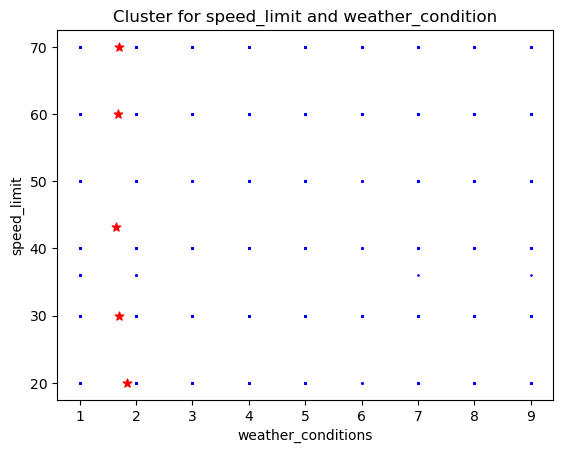

In [140]:
plt.scatter(data = df_accident[['speed_limit','weather_conditions']], x = 'weather_conditions', y = 'speed_limit', s=0.8, color = 'blue')
plt.xlabel('weather_conditions')
plt.ylabel('speed_limit')


# Plot cluster centers
plt.scatter(centers[:,1], centers[:,0], marker='*', color='red', s=40, label='Cluster Centers')
plt.title('Cluster for speed_limit and weather_condition')
plt.show()


C:\Users\binto\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


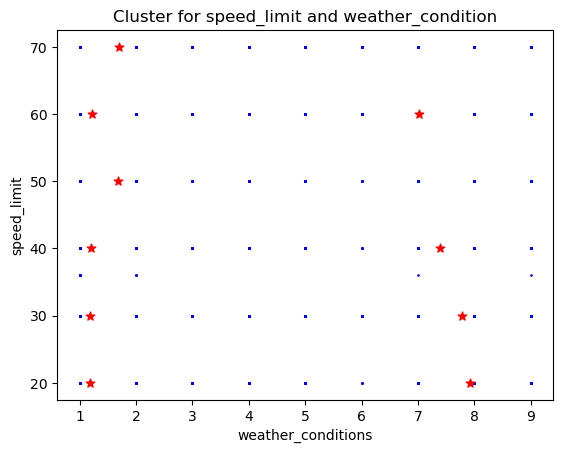

In [141]:
kmeans = KMeans(n_clusters = 10)
kmeans.fit(df_accident_speed_weather)

labels = kmeans.predict(df_accident_speed_weather)
centers = kmeans.cluster_centers_

plt.scatter(data = df_accident[['speed_limit','weather_conditions']], x = 'weather_conditions', y = 'speed_limit', s=0.8, color = 'blue')
plt.xlabel('weather_conditions')
plt.ylabel('speed_limit')


# Plot cluster centers
plt.scatter(centers[:,1], centers[:,0], marker='*', color='red', s=40, label='Cluster Centers')
plt.title('Cluster for speed_limit and weather_condition')
plt.show()


#### 7. Outlier Detection

IQR on Humberside Region

In [142]:
# Selecting the features
Humberside_accident = Humberside[['latitude', 'longitude']]

# IQR method
q1 = Humberside_accident.quantile(0.25)
q3 = Humberside_accident.quantile(0.75)
iqr = q3 - q1

lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

iqr_outliers = ((Humberside_accident < lower ) | (Humberside_accident > upper)).any(axis=1)

In [143]:
iqr

latitude     0.190952
longitude    0.226924
dtype: float64

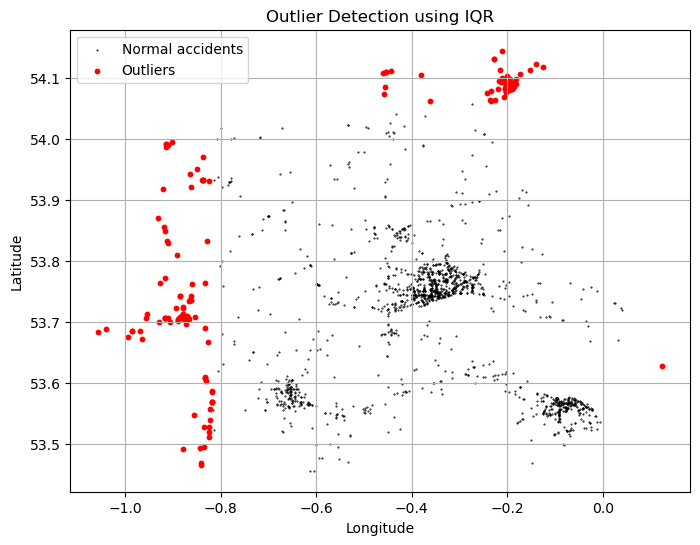

In [144]:
# Create a scatter plot 
plt.figure(figsize=(8, 6))
plt.scatter(Humberside['longitude'], Humberside['latitude'], s=0.2, color='black', label='Normal accidents')

# Plot outliers in red
outliers = iqr_outliers
plt.scatter(Humberside[outliers]['longitude'], Humberside[outliers]['latitude'], s=10, color='red', label='Outliers')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Outlier Detection using IQR')
plt.legend()
plt.grid(True)
plt.show()

In [145]:
# Creating a Folium map 
outliers_iqr_map = folium.Map(location=[Humberside_accident['latitude'].mean(), Humberside_accident['longitude'].mean()], zoom_start=9)

# Adding outlier locations
for i, row in Humberside[iqr_outliers].iterrows():
    folium.CircleMarker(location=[row['latitude'], row['longitude']], radius=2, color='red', fill=True, fill_color='red').add_to(outliers_iqr_map)

In [146]:
outliers_iqr_map

Local Outlier Factor for Outlier Distribution

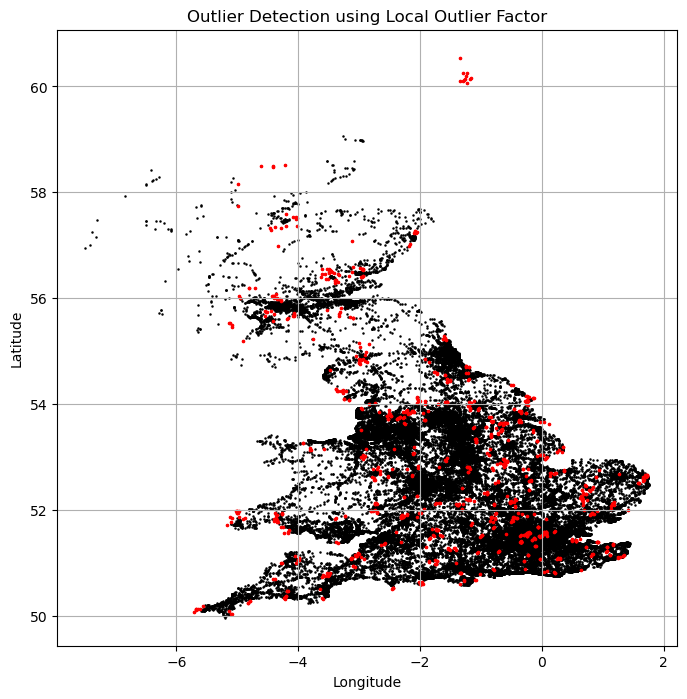

In [147]:
from sklearn.neighbors import LocalOutlierFactor

# Selecting features
outlier_data = df_accident[['latitude', 'longitude']]

# Local Outlier Factor (LOF)
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01)  
lof_outliers = lof.fit_predict(outlier_data)

outliers_mask = lof_outliers == -1


plt.figure(figsize=(8,8))
plt.scatter(outlier_data.loc[:, 'longitude'], outlier_data.loc[:, 'latitude'], c='black', s=0.6)  
plt.scatter(outlier_data.loc[outliers_mask, 'longitude'], outlier_data.loc[outliers_mask, 'latitude'], c='red', s=2.6)  # Outliers are red
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Outlier Detection using Local Outlier Factor')
plt.grid(True)
plt.show()


#### Prediction

#### Feature importance with Random Forest.

In [148]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [149]:
df_accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91199 entries, 0 to 91198
Data columns (total 38 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   accident_index                               91199 non-null  object 
 1   accident_year                                91199 non-null  int64  
 2   accident_reference                           91199 non-null  object 
 3   location_easting_osgr                        91199 non-null  float64
 4   location_northing_osgr                       91199 non-null  float64
 5   longitude                                    91199 non-null  float64
 6   latitude                                     91199 non-null  float64
 7   police_force                                 91199 non-null  int64  
 8   accident_severity                            91199 non-null  int64  
 9   number_of_vehicles                           91199 non-null  int64  
 10

In [150]:
accident_target = df_accident[['accident_index', 'speed_limit','number_of_vehicles','urban_or_rural_area','light_conditions','weather_conditions','road_type','pedestrian_crossing_human_control','road_surface_conditions','junction_control', 'number_of_vehicles', 'number_of_casualties', 'pedestrian_crossing_physical_facilities']]

vehicle_features = df_vehicle[['accident_index', 'engine_capacity_cc','age_of_vehicle','vehicle_type','sex_of_driver']]

casualty_features = df_casualty[['accident_index', 'age_of_casualty','casualty_type', 'sex_of_casualty','casualty_class','pedestrian_movement','pedestrian_location','casualty_severity']]

In [151]:
merged = pd.merge(accident_target, vehicle_features, on='accident_index', how='inner')

merged_features = pd.merge(merged, casualty_features, on='accident_index', how='inner')

# Removes any duplicated columns
merged_features = merged_features.loc[:,~merged_features.columns.duplicated()]

In [152]:
merged_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220435 entries, 0 to 220434
Data columns (total 23 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   accident_index                           220435 non-null  object 
 1   speed_limit                              220435 non-null  int64  
 2   number_of_vehicles                       220435 non-null  int64  
 3   urban_or_rural_area                      220435 non-null  int64  
 4   light_conditions                         220435 non-null  int64  
 5   weather_conditions                       220435 non-null  int64  
 6   road_type                                220435 non-null  int64  
 7   pedestrian_crossing_human_control        220435 non-null  int64  
 8   road_surface_conditions                  220435 non-null  int64  
 9   junction_control                         220435 non-null  int64  
 10  number_of_casualties            

In [153]:
num_features = ['speed_limit','number_of_vehicles','number_of_casualties', 'engine_capacity_cc','age_of_vehicle','age_of_casualty']
cat_features = ['urban_or_rural_area','light_conditions','weather_conditions','road_type','pedestrian_crossing_human_control','road_surface_conditions','junction_control','pedestrian_crossing_physical_facilities','vehicle_type','sex_of_driver','casualty_type','sex_of_casualty','casualty_class','pedestrian_movement','pedestrian_location']
x_num = merged_features[num_features] 
x_cat = merged_features[cat_features]

In [154]:
# Apply LabelEncoder to each column in x_cat [to encode the data to make it numerical]
label = LabelEncoder() 

# Create a new DataFrame for encoded categorical features
x_cat_label = pd.DataFrame()
for i in x_cat.columns:
    x_cat_label[i] = label.fit_transform(x_cat[i])
    
# Concatenate x_num with x_cat_label
x = np.concatenate((x_num, x_cat_label), axis = 1)

In [155]:
x

array([[20.,  1.,  1., ...,  2.,  5.,  9.],
       [20.,  1.,  2., ...,  2.,  1.,  1.],
       [20.,  1.,  2., ...,  2.,  1.,  1.],
       ...,
       [30.,  2.,  1., ...,  0.,  0.,  0.],
       [30.,  2.,  1., ...,  0.,  0.,  0.],
       [30.,  1.,  1., ...,  2.,  9.,  9.]])

In [156]:
df_casualty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115584 entries, 0 to 115583
Data columns (total 19 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   casualty_index                      115584 non-null  int64 
 1   accident_index                      115584 non-null  object
 2   accident_year                       115584 non-null  int64 
 3   accident_reference                  115584 non-null  object
 4   vehicle_reference                   115584 non-null  int64 
 5   casualty_reference                  115584 non-null  int64 
 6   casualty_class                      115584 non-null  int64 
 7   sex_of_casualty                     115584 non-null  int64 
 8   age_of_casualty                     115584 non-null  int64 
 9   age_band_of_casualty                115584 non-null  int64 
 10  casualty_severity                   115584 non-null  int64 
 11  pedestrian_location                 115

In [157]:
y = merged_features['casualty_severity']

In [158]:
merged_features = merged_features.drop(columns = ['casualty_severity', 'accident_index'])

In [159]:
merged_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220435 entries, 0 to 220434
Data columns (total 21 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   speed_limit                              220435 non-null  int64  
 1   number_of_vehicles                       220435 non-null  int64  
 2   urban_or_rural_area                      220435 non-null  int64  
 3   light_conditions                         220435 non-null  int64  
 4   weather_conditions                       220435 non-null  int64  
 5   road_type                                220435 non-null  int64  
 6   pedestrian_crossing_human_control        220435 non-null  int64  
 7   road_surface_conditions                  220435 non-null  int64  
 8   junction_control                         220435 non-null  int64  
 9   number_of_casualties                     220435 non-null  int64  
 10  pedestrian_crossing_physical_fac

In [160]:
x.shape

(220435, 21)

In [161]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [162]:
# Applying standardisation to rescale the input features
scale = StandardScaler()
scale.fit(X_train)
x_train_scaled = scale.transform(X_train)
x_test_scaled = scale.transform(X_test)

In [163]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(x_train_scaled,y_train)

RandomForestRegressor(random_state=42)

In [164]:
rf_model.feature_importances_

array([0.05670538, 0.04120123, 0.04312301, 0.14796475, 0.11946183,
       0.21647714, 0.01662662, 0.02766074, 0.03676875, 0.03091724,
       0.0057177 , 0.03059863, 0.0160314 , 0.0276289 , 0.03134748,
       0.02627073, 0.06430659, 0.02392858, 0.01827564, 0.00941854,
       0.00956912])

In [165]:
merged_features.columns

Index(['speed_limit', 'number_of_vehicles', 'urban_or_rural_area',
       'light_conditions', 'weather_conditions', 'road_type',
       'pedestrian_crossing_human_control', 'road_surface_conditions',
       'junction_control', 'number_of_casualties',
       'pedestrian_crossing_physical_facilities', 'engine_capacity_cc',
       'age_of_vehicle', 'vehicle_type', 'sex_of_driver', 'age_of_casualty',
       'casualty_type', 'sex_of_casualty', 'casualty_class',
       'pedestrian_movement', 'pedestrian_location'],
      dtype='object')

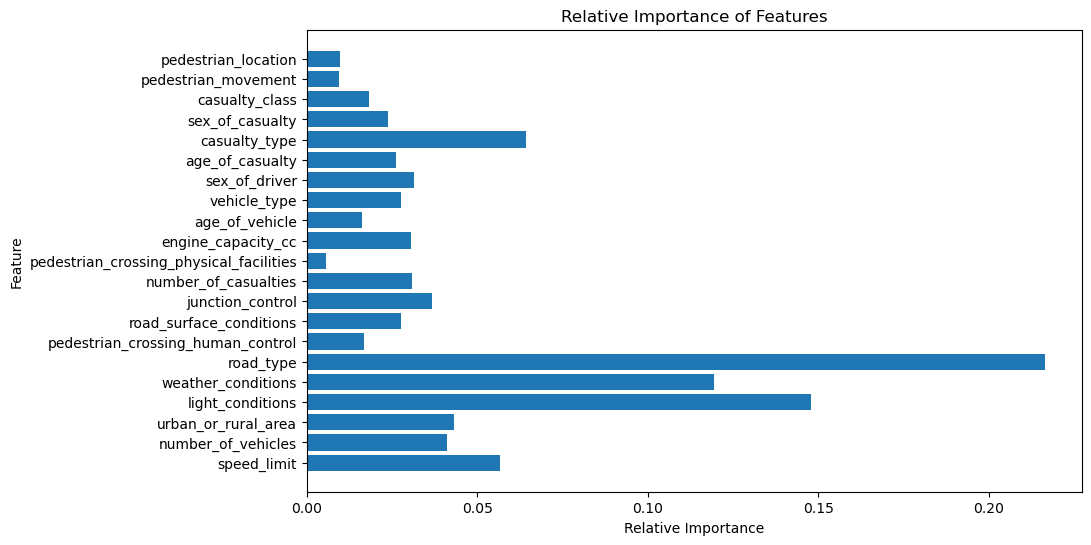

In [166]:
plt.figure(figsize=(10, 6))
plt.barh(merged_features.columns, rf_model.feature_importances_)
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
plt.title('Relative Importance of Features')
plt.show()

From this, chosen features are : ''road_type', 'weather_condition','light_condition', 'casualty_type', 'speed_limit', 'urban_or_rural_area', 'number_of vehicle', 'juncition_control'.

#### MODEL

In [167]:
merged_1 = pd.merge(accident_target, vehicle_features, on='accident_index', how='inner')

merged_features_1 = pd.merge(merged_1, casualty_features, on='accident_index', how='inner')

merged_features_1 = merged_features_1.loc[:,~merged_features_1.columns.duplicated()]

In [168]:
merged_features_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220435 entries, 0 to 220434
Data columns (total 23 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   accident_index                           220435 non-null  object 
 1   speed_limit                              220435 non-null  int64  
 2   number_of_vehicles                       220435 non-null  int64  
 3   urban_or_rural_area                      220435 non-null  int64  
 4   light_conditions                         220435 non-null  int64  
 5   weather_conditions                       220435 non-null  int64  
 6   road_type                                220435 non-null  int64  
 7   pedestrian_crossing_human_control        220435 non-null  int64  
 8   road_surface_conditions                  220435 non-null  int64  
 9   junction_control                         220435 non-null  int64  
 10  number_of_casualties            

In [169]:
selected_features = ['road_type', 'weather_conditions', 'light_conditions', 'casualty_type', 'speed_limit', 'urban_or_rural_area',
                     'number_of_vehicles', 'junction_control', 'engine_capacity_cc']

In [170]:
merged_features_1['fatal'] = merged_features_1['casualty_severity'].apply(lambda x: 1 if x == 1 else 0)

In [171]:
num_features = ['speed_limit','number_of_vehicles', 'engine_capacity_cc']
cat_features = ['urban_or_rural_area','light_conditions','weather_conditions','road_type','junction_control','casualty_type']
x_num = merged_features[num_features] 
x_cat = merged_features[cat_features]
y = merged_features_1['fatal']

In [173]:
# Apply LabelEncoder to each column in x_cat [to encode the data to make it numerical]
label = LabelEncoder() 

# Create a new DataFrame for encoded categorical features
x_cat_label = pd.DataFrame()
for i in x_cat.columns:
    x_cat_label[i] = label.fit_transform(x_cat[i])
    
# Concatenate x_num with x_cat_label
x = np.concatenate((x_num, x_cat_label), axis = 1)

In [174]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [175]:
# Applying standardisation to rescale the input features
scale = StandardScaler()
scale.fit(X_train)
x_train_scaled = scale.transform(X_train)
x_test_scaled = scale.transform(X_test)

In [176]:
# Train Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=300)
rf_classifier.fit(x_train_scaled, y_train)

RandomForestClassifier(n_estimators=300)

In [177]:
y_pred = rf_classifier.predict(x_test_scaled)

In [178]:
print("Classification Report:")
target_names = ['Non_fatal', 'Fatal']
print(classification_report(y_test, y_pred, target_names=target_names))

Classification Report:
              precision    recall  f1-score   support

   Non_fatal       0.99      1.00      0.99     43581
       Fatal       0.33      0.10      0.15       506

    accuracy                           0.99     44087
   macro avg       0.66      0.55      0.57     44087
weighted avg       0.98      0.99      0.98     44087



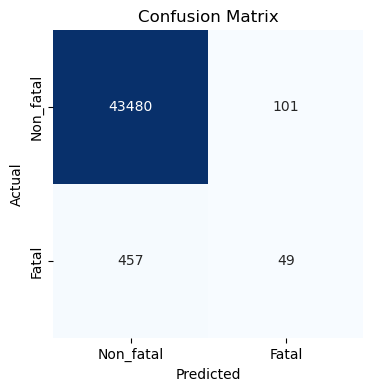

In [179]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(4,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Non_fatal', 'Fatal'], yticklabels=['Non_fatal', 'Fatal'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()